<a href="https://colab.research.google.com/github/AhmedMahmoudMetwally/Employee-Churn-Analysis-/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/NTI/Projects/Employee TurnOver/df_encoded.csv"

In [ ]:
df_encoded = pd.read_csv(url)


In [ ]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,2
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   quit                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary                  14999 non-null  int64  
 9   department_IT           14999 non-null  bool   
 10  department_RandD        14999 non-null  bool   
 11  department_accounting   14999 non-null  bool   
 12  department_hr           14999 non-null  bool   
 13  department_management   14999 non-null  bool   
 14  department_marketing    14999 non-null

In [ ]:
df_encoded.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
quit,0
promotion_last_5years,0
salary,0
department_IT,0


#**Tasks :**
#- Handle outliers
#- Handling Missing values
#- Handle Class Imbalance
#- Scalling
#- Encode categorical variables
#- Drop Irrelevant Columns


In [ ]:
df_encoded=df_encoded.replace({True:1,False:0})

/tmp/ipython-input-16-3895346211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded=df_encoded.replace({True:1,False:0})


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   quit                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary                  14999 non-null  int64  
 9   department_IT           14999 non-null  int64  
 10  department_RandD        14999 non-null  int64  
 11  department_accounting   14999 non-null  int64  
 12  department_hr           14999 non-null  int64  
 13  department_management   14999 non-null  int64  
 14  department_marketing    14999 non-null

# Split The Data

In [ ]:
X = df_encoded.drop(columns = "quit")
y = df_encoded["quit"]

In [ ]:
X.shape, y.shape

((14999, 19), (14999,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2,random_state=42,stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11999, 19), (3000, 19), (11999,), (3000,))

Apply preprocessing steps only on training data

Outlier handling

Scaling (fit on train, transform on both train and test)

SMOTE or other balancing (only on train)

Feature engineering

# Handle Outliers

In [ ]:
# plot the outliers
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

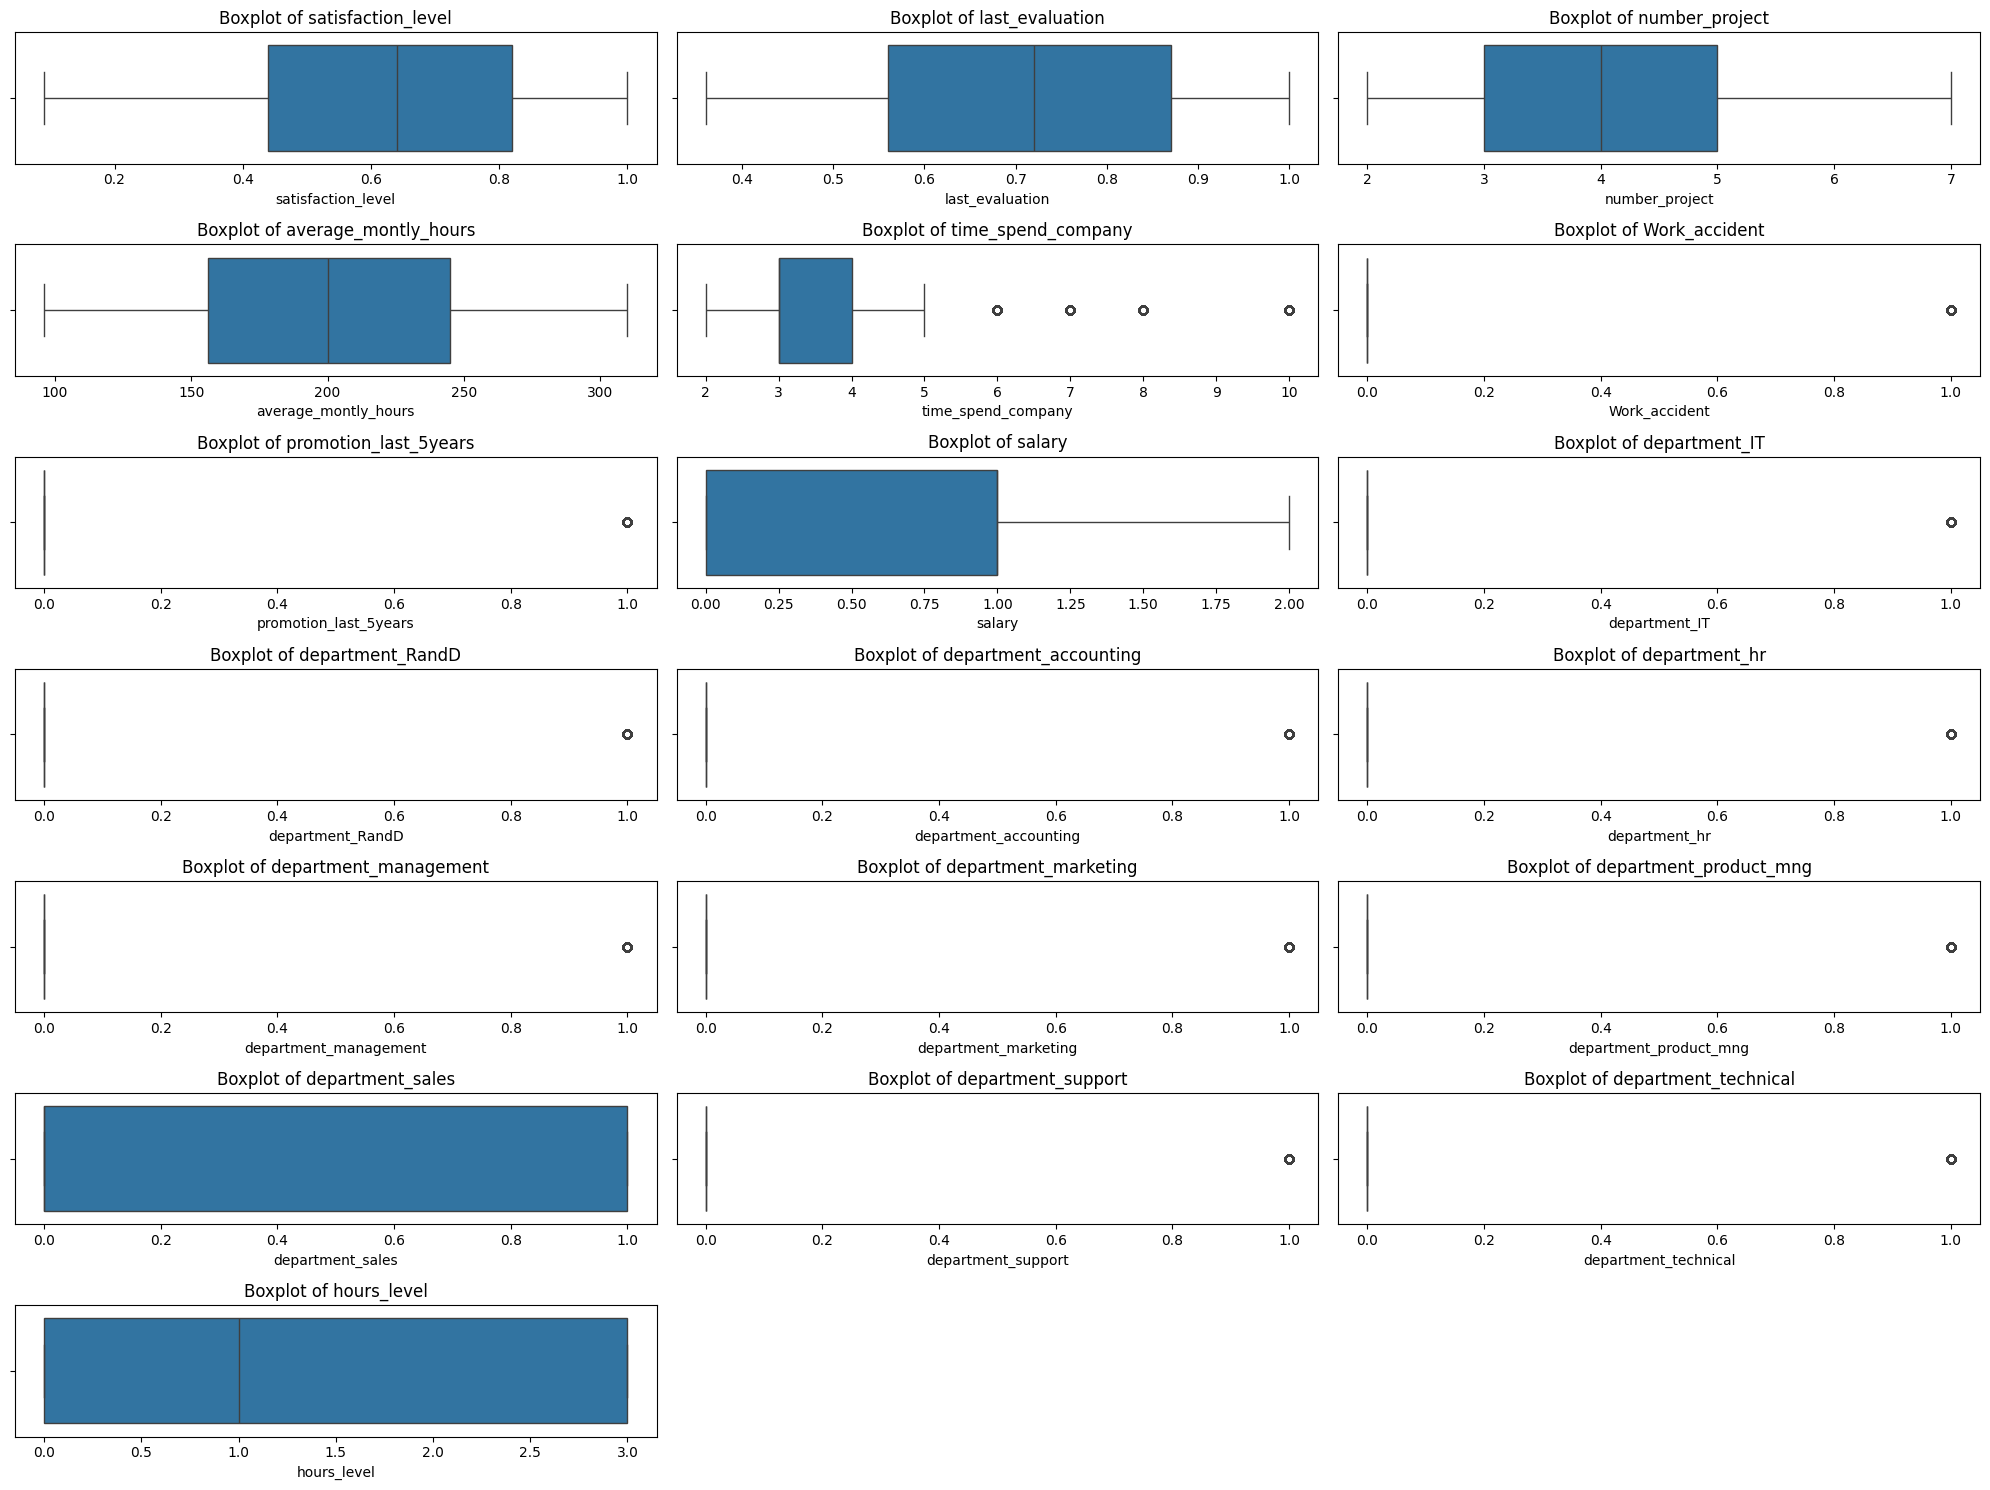

In [ ]:


plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
def get_outliers_info(df):
  outlier_info = {}

  for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_indices = outliers.index.tolist()

    outlier_info[col] = {
        "count": len(outliers_indices),
        "indices":outliers_indices
    }

  return outlier_info

In [ ]:
outliers_dict  = get_outliers_info(X_train)

for col, info in outliers_dict.items():
    print(f"Column: {col}")
    print(f"Number of outliers: {info['count']}")
    print(f"Outlier indices: {info['indices']}\n")

Column: satisfaction_level
Number of outliers: 0
Outlier indices: []

Column: last_evaluation
Number of outliers: 0
Outlier indices: []

Column: number_project
Number of outliers: 0
Outlier indices: []

Column: average_montly_hours
Number of outliers: 0
Outlier indices: []

Column: time_spend_company
Number of outliers: 1039
Outlier indices: [1082, 7389, 2287, 11627, 6641, 13104, 13975, 10184, 34, 11936, 625, 2932, 1796, 11210, 14942, 13775, 13772, 14562, 2017, 13472, 9202, 11669, 11565, 4117, 4929, 12625, 13755, 14121, 13823, 5677, 10753, 14258, 12628, 13738, 5012, 11133, 11216, 4041, 4944, 13758, 2024, 11084, 11222, 3418, 7852, 1835, 13503, 13882, 11748, 9487, 1043, 13952, 10548, 12416, 11626, 11264, 14333, 10479, 11520, 13416, 14186, 13339, 13958, 11647, 13953, 10537, 13438, 17, 5570, 11621, 2835, 1957, 11456, 11082, 6016, 13417, 14563, 11289, 14641, 7638, 11611, 6260, 13621, 13777, 10214, 6442, 13183, 4516, 11754, 13731, 2173, 13407, 11290, 5655, 1900, 13492, 11115, 11622, 3546, 40

**According to we have many outliers so we will not remove it but we will use tree-based models for robustness and we will use RobustScaler**

# Handling Missing Values

In [ ]:
X_train.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
department_IT,0
department_RandD,0


In [ ]:
X_test.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
department_IT,0
department_RandD,0


In [ ]:
y_train.isnull().sum()

np.int64(0)

In [ ]:
y_test.isnull().sum()

np.int64(0)

# Handle Class Imbalance

/tmp/ipython-input-38-111965383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quit",data=df_encoded,palette="Set2")


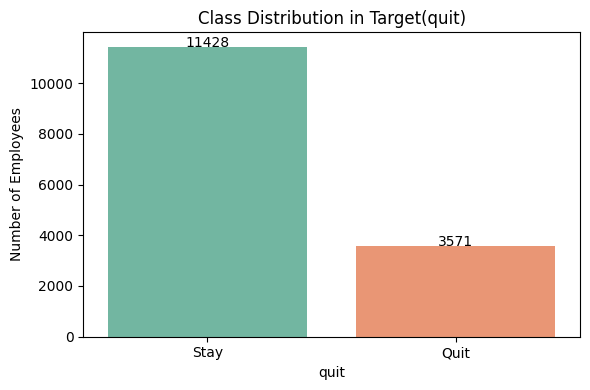

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="quit",data=df_encoded,palette="Set2")

plt.title("Class Distribution in Target(quit)")

plt.ylabel("Number of Employees")
plt.xticks([0,1],["Stay","Quit"])

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,
             p.get_height() + 5,
             int(p.get_height()),
             ha='center')

plt.tight_layout()
plt.show()


In [ ]:
df_encoded["quit"].value_counts()

,count
quit,
0,11428
1,3571


In [ ]:
df_encoded["quit"].value_counts(normalize = True)

,proportion
quit,
0,0.761917
1,0.238083


In [ ]:
y_train.value_counts()

,count
quit,
0,9142
1,2857


In [ ]:
y_train.value_counts(normalize = True)

,proportion
quit,
0,0.761897
1,0.238103


SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train,y_train)

SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train,y_train)

In [ ]:
resampled_df = pd.DataFrame({"quit":y_train_resampled_smote})
resampled_df.head()

,quit
0,0
1,1
2,1
3,0
4,0


/tmp/ipython-input-53-69366503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quit",data=resampled_df,palette="Set2")


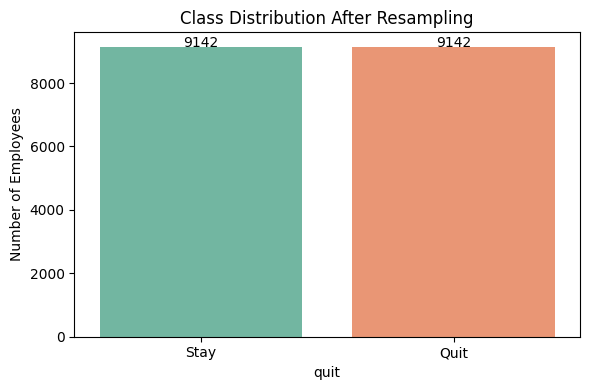

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="quit",data=resampled_df,palette="Set2")
plt.title("Class Distribution After Resampling")
plt.xticks([0,1],["Stay","Quit"])
plt.ylabel("Number of Employees")

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,
             p.get_height() + 5,
             int(p.get_height()),
             ha='center')

plt.tight_layout()
plt.show()

# Scaling

✅ Why RobustScaler is a good fit:
It scales features using the median and the interquartile range (IQR).

Unlike StandardScaler or MinMaxScaler, it is not affected by extreme values (i.e., outliers).

Formula:

𝑋
scaled
=
𝑋
−
Median
(
𝑋
)
IQR
(
𝑋
)
X
scaled
​
 =
IQR(X)
X−Median(X)
​



In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert the data from numpy array into dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [ ]:
X_train_scaled_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
count,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000
mean,0.007313,-0.035739,-0.069842,-0.006825,0.607963,0.098939,0.014165,0.494531,0.068967,0.037847,0.042879,0.047637,0.030683,0.050700,0.050700,0.269635,0.140943,0.176220,-0.165372
std,0.658384,0.524598,0.478660,0.536448,1.304486,0.298588,0.118176,0.605561,0.253406,0.190832,0.202590,0.213003,0.172461,0.219391,0.219391,0.443782,0.347972,0.381017,0.421247
min,-1.139369,-1.078177,-0.666667,-1.069307,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667
25%,-0.405547,-0.553659,-0.666667,-0.514851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.594453,0.446341,0.333333,0.485149,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333
max,1.114600,0.786778,1.000000,1.049505,7.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333


In [ ]:
X_train_resampled_smote.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
count,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000
mean,0.552953,0.717736,3.790473,203.310654,3.607963,0.098939,0.014165,0.494531,0.068967,0.037847,0.042879,0.047637,0.030683,0.050700,0.050700,0.269635,0.140943,0.176220,1.503883
std,0.265811,0.180027,1.435981,54.181237,1.304486,0.298588,0.118176,0.605561,0.253406,0.190832,0.202590,0.213003,0.172461,0.219391,0.219391,0.443782,0.347972,0.381017,1.263741
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386268,0.540000,2.000000,152.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.550000,0.730000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.790000,0.883172,5.000000,253.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
X_train_scaled_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
0,0.445840,-0.320539,0.000000,0.425743,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333
1,0.569684,0.786778,0.333333,0.316832,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
2,-1.114600,-0.524519,-0.666667,0.425743,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333
3,0.099076,-0.641079,-0.666667,-0.772277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.666667
4,0.321996,-0.728498,0.000000,0.465347,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333


In [ ]:
X_train_scaled_df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
department_IT,0
department_RandD,0


# Save the Data

In [64]:
X_train_scaled_df.to_csv("X_train_scaled.csv",index=False)
X_test_scaled_df.to_csv("X_test_scaled.csv",index=False)
y_train_resampled_smote.to_csv("y_train_resampled.csv",index=False)
y_test.to_csv("y_test.csv",index=False)